# Predicting players rating



In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

## About the Dataset

The ultimate Soccer database for data analysis and
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations,
with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the
weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000
matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video
games. It is not just the stats that come with a new version of the game but also the weekly
updates. So for instance if a player has performed poorly over a period of time and his stats get
impacted in FIFA, you would normally see the same in the dataset.

Python skills required to complete this project
SQL:
The data is in SQL database so students need to retrive using query language. They also need to
know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.

1/19/2018 ML Project(Updated) (1)

http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4
SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring.
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You
do not need to install this module separately because it is shipped by default along with Python
version 2.5.x onwards.
To use sqlite3 module, you must first create a connection object that represents the database and
then optionally you can create a cursor object, which will help you in executing all the SQL
statements.

Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use
data structures and data analysis tools for the Python programming language. Python with Pandas
is used in a wide range of fields including academic and commercial domains including finance,
economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python
Pandas and how to use them in practice.

Scikit Learn
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent
interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can use
scikit-learn. This stack that includes:

NumPy: Base n-dimensional array package

SciPy: Fundamental library for scientific computing

Matplotlib: Comprehensive 2D/3D plotting

IPython: Enhanced interactive console

Sympy: Symbolic mathematics

Pandas: Data structures and analysis

Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides
learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems.
This means a deep focus on concerns such as easy of use, code quality, collaboration,
documentation and performance.

Machine Learning skills required to complete the
project
Supervised learning
Supervised learning deals with learning a function from available training data. A supervised
learning algorithm analyzes the training data and produces an inferred function, which can be used
for mapping new examples.

1/19/2018 ML Project(Updated) (1)

http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 3/4

Regression
Regression is a parametric technique used to predict continuous (dependent) variable given a set of
independent variables. It is parametric in nature because it makes certain assumptions (discussed
next) based on the data set. If the data set follows those assumptions, regression gives incredible
results.

Model evaluation
Student must know how to judge a model on unseen data. What metric to select to judge the
performance

## Let's get started.....

Import Libraries


Read Data from the Database into pandas


In [49]:

import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as  sns

## Data Preprocessing

In [50]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [51]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [52]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [53]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [54]:
df.shape

(183978, 42)

## Data Cleaning

In [55]:
df.isna().values.any()

True

In [56]:
df.isnull().values.any()

True

In [57]:
df1 = df.dropna() #drop the rows where atleast 1 element is missing 

In [58]:
df1.shape

(180354, 42)

In [59]:
df1.columns #check the columns of dataframe df1

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [60]:
#drop the columns id, player_fifa_api_id, player_api_id which are not necessary.

df1 = df1.drop(["id", "player_fifa_api_id", "player_api_id"], axis = 1)
df1.shape

(180354, 39)

In [61]:
df1.columns

Index(['date', 'overall_rating', 'potential', 'preferred_foot',
       'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration',
       'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power',
       'jumping', 'stamina', 'strength', 'long_shots', 'aggression',
       'interceptions', 'positioning', 'vision', 'penalties', 'marking',
       'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [62]:
predictors = list(df1.columns[1:])
print(predictors)

['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


## Data Exploration

In [63]:
y = df['overall_rating']
df[df.columns[:]].corr()['overall_rating'][:]

id                   -0.002875
player_fifa_api_id   -0.274089
player_api_id        -0.322389
overall_rating        1.000000
potential             0.766757
crossing              0.357699
finishing             0.329298
heading_accuracy      0.314099
short_passing         0.458361
volleys               0.361470
dribbling             0.354324
curve                 0.357772
free_kick_accuracy    0.349592
long_passing          0.435018
ball_control          0.444257
acceleration          0.245655
sprint_speed          0.254841
agility               0.239896
reactions             0.769246
balance               0.160364
shot_power            0.427996
jumping               0.259023
stamina               0.327456
strength              0.318661
long_shots            0.392382
aggression            0.323934
interceptions         0.250370
positioning           0.370019
vision                0.431137
penalties             0.393189
marking               0.133377
standing_tackle       0.165349
sliding_

## Data Visualization

### Histogram plot

In [ ]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(predictors):
        ax.hist(df1[predictors[i]])
        ax.set_title(predictors[i])
plt.tight_layout()
plt.show()

### Scatter plot

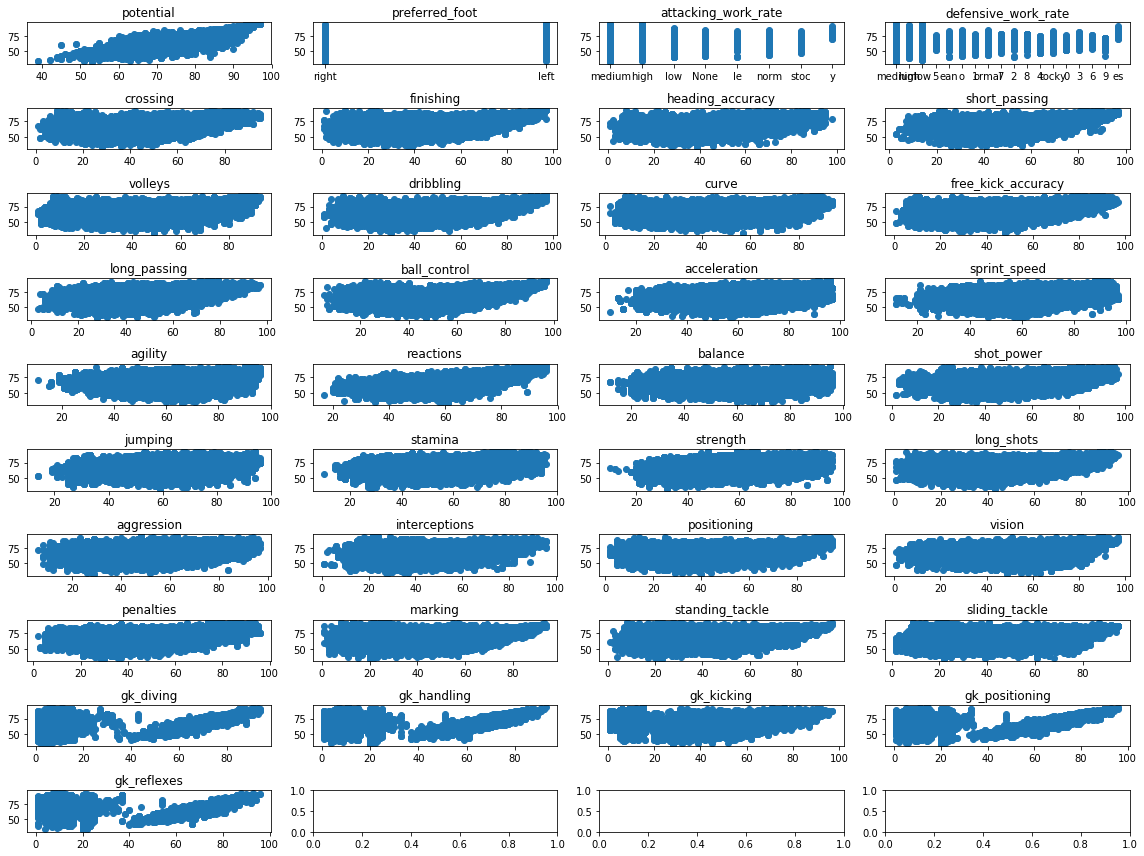

In [18]:
fig, axes = plt.subplots(10, 4, figsize=(16, 12))
for i,ax in enumerate(axes.flat):
    if i < len(predictors)-1:
        ax.scatter(df1[predictors[i+1]], df1[predictors[0]])
        ax.set_title(predictors[i+1])
plt.tight_layout()
plt.show()

In [19]:
axes[0,0].hist(df1[predictors[0]]) 

(array([3.3000e+01, 2.9200e+02, 2.0160e+03, 8.2530e+03, 2.8922e+04,
        5.8589e+04, 5.3453e+04, 2.3470e+04, 4.9810e+03, 3.4500e+02]),
 array([33. , 39.1, 45.2, 51.3, 57.4, 63.5, 69.6, 75.7, 81.8, 87.9, 94. ]),
 <a list of 10 Patch objects>)

In [ ]:
plt.hist(df1["preferred_foot"]) #Histogram for preferred_foot

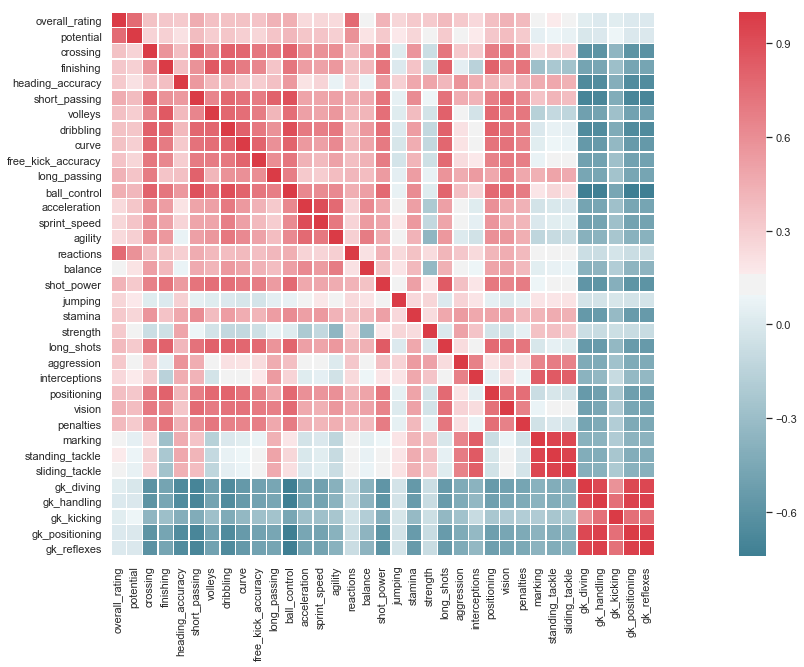

In [19]:
#Correlation Matrix
sns.set(style="white")
df_corr= df1[1:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio

## Data Preparation

In [20]:
df1.loc[:, "new_date"] = df1["date"].apply(pd.to_datetime) #Creating a new column new_date and changing the date time format

In [21]:
df1.loc[:, "day"] = df1["new_date"].apply(lambda x: x.day) #Creating a day column and assigning the day values of new_date column

In [22]:
df1.loc[:, "month"] = df1["new_date"].apply(lambda x: x.month) #Creating a month column and assigning the month values of new_date column

In [23]:
df1.loc[:, "year"] = df1["new_date"].apply(lambda x: x.year) #Creating a day year and assigning the year values of new_date column

In [24]:
df1["year"].unique() #Unique year values of the year column

array([2016, 2015, 2007, 2014, 2013, 2012, 2011, 2010, 2009, 2008],
      dtype=int64)

In [25]:
cat_clms =  ["preferred_foot", "attacking_work_rate", "defensive_work_rate", "year", "month", "day"] #Catagory Column List

In [26]:
df1.head() #Returns the first 5 rows of dataframe df1

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,new_date,day,month,year
0,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2016-02-18,18,2,2016
1,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-11-19,19,11,2015
2,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,69.0,6.0,11.0,10.0,8.0,8.0,2015-09-21,21,9,2015
3,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2015-03-20,20,3,2015
4,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,66.0,5.0,10.0,9.0,7.0,7.0,2007-02-22,22,2,2007


In [27]:
df1 =  df1.drop(["date", "new_date"], axis = 1) #Dropping the date and new_date columns

In [28]:
for column in cat_clms:
    dummies = pd.get_dummies(df1[column], prefix = column)
    df1 = df1.join(dummies)
    df1 = df1.drop(column, axis = 1)

In [29]:
df1.columns #Columns of dataframe df1

Index(['overall_rating', 'potential', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve',
       'free_kick_accuracy',
       ...
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31'],
      dtype='object', length=116)

In [30]:
df.describe() #The summary statistics of the dataframe df

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [31]:
df.shape #Return a tuple representing the dimensionality of the DataFrame df.

(183978, 42)

## Train, Test & Split

In [45]:
#Spliting the dataset into two: target value and predictor values. 
X = df1.drop('overall_rating', axis = 1) #All features except overall_rating ( predictor values )
Y = df1['overall_rating'] #overall_rating ( target value )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape) #Training data shape (predictor values) : 80%
print(X_test.shape) #Test data shape (predictor values) : 20%
print(Y_train.shape) #Training data shape (target values) : 80%
print(Y_test.shape) #Test data shape (target values) : 20%


(144283, 115)
(36071, 115)
(144283,)
(36071,)


## Creating and Training the Model

In [46]:
lm = LinearRegression() #Creating an instance of LinearRegression
lm.fit(X_train, Y_train) #Fitting the created instance of the LinearRegression


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
#Printing intercept 
print(lm.intercept_)


11723664701.724281


In [35]:
#Printing coefficients
print(lm.coef_)

[ 3.86623658e-01  2.43047833e-02  1.23971439e-02  7.27979287e-02
  3.22868683e-02  5.96864532e-03 -1.82715852e-02  8.10538404e-03
  1.28534971e-02  8.99218145e-03  1.26064812e-01  7.26566385e-03
  1.44866991e-02 -1.17563833e-02  1.98824677e-01  1.00093161e-02
  1.52518540e-02  1.17339069e-02  1.83598556e-04  5.25177130e-02
 -1.62307370e-02  2.06919663e-02  2.09930485e-02 -6.73329031e-03
  1.01764940e-02  1.66483836e-02  2.99035941e-02  1.93863201e-03
 -3.01913364e-02  1.27984539e-01  3.85539523e-02  1.99921840e-04
  5.57382685e-02  2.73010711e-02  1.76542863e+07  1.76542863e+07
 -1.38888503e+10 -1.38888503e+10 -6.16007267e+09 -1.38888503e+10
 -1.38888503e+10 -6.16365883e+09 -6.16129902e+09 -6.15869117e+09
  1.56892102e+09  1.56892102e+09  1.56892102e+09  1.56892102e+09
  1.56892102e+09  1.56892102e+09  1.56892102e+09  1.56892102e+09
  1.56892103e+09  1.56892102e+09 -6.15985661e+09 -6.16123810e+09
  1.56892102e+09  1.56892102e+09  1.56892102e+09  1.56892102e+09
 -6.15627044e+09 -6.15863

## Predicting overall_rating using Test Data

In [36]:
Y_pred = lm.predict(X_test) #Calculating the prediction values

Y_pred.shape #Prediction shape from test data


(36071,)

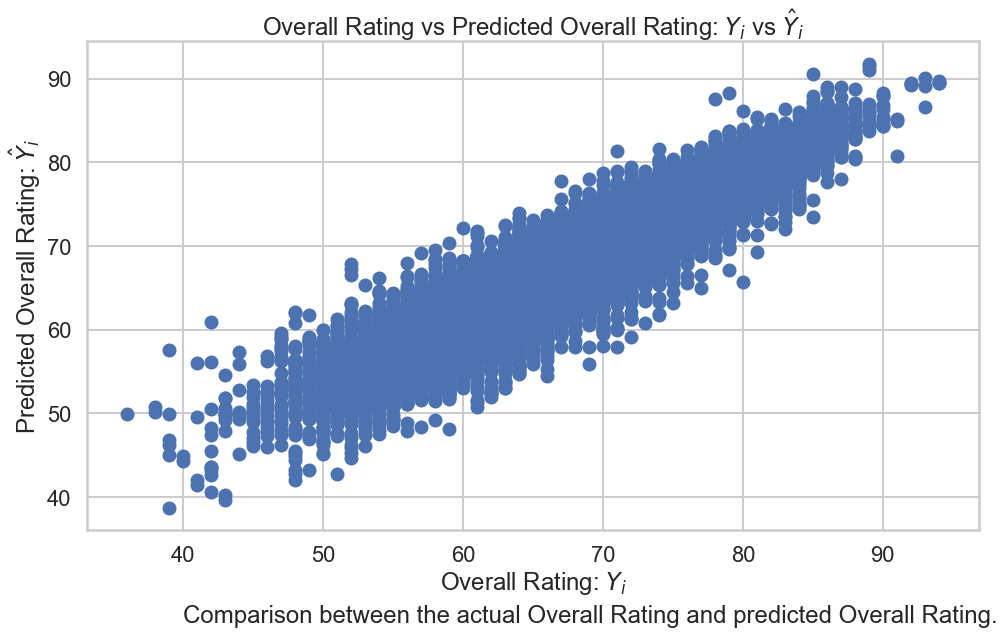

In [37]:
#To visualize the differences between actual overall rating and predicted values, creating a scatter plot.
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Overall Rating: $Y_i$")
plt.ylabel("Predicted Overall Rating: $\hat{Y}_i$")
plt.title("Overall Rating vs Predicted Overall Rating: $Y_i$ vs $\hat{Y}_i$")
plt.text(40,25, "Comparison between the actual Overall Rating and predicted Overall Rating.", ha='left')
plt.show()


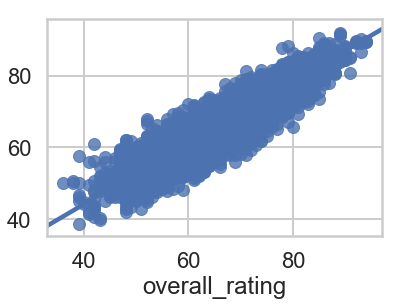

In [38]:
sns.regplot(Y_test, Y_pred, data=df1, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

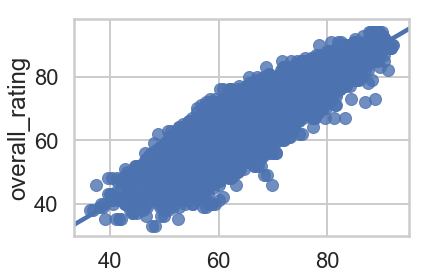

In [39]:
sns.regplot(x=lm.predict(X), y=df1['overall_rating'], data=df1, fit_reg=True) #Plot predicted and actual Overall Rating values.

## Model Evaluation Using Cross-Validation

In [42]:
#Evaluating the model using 10-fold cross-validation
scores = cross_val_score(LinearRegression(), X, Y, scoring='neg_mean_squared_error', cv=10)
scores

np.sqrt(scores.mean() * -1)

print("The Root Mean Square Error using cross validation for the Model is "+ str(np.sqrt(scores.mean() * -1)) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")


The Root Mean Square Error using cross validation for the Model is 2.7016406554897285 and the Results can be further improved using feature extraction and rebuilding, training the model.


## Evaluating the Model Using RMSE

In [43]:
#Calculating Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred) #Mean Squared Error: To check the level of error of a model
print(mse)


7.199824249005155


In [44]:
#Calculating Root Mean Squared Error#Calcula 
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

print("The Root Mean Square Error (RMSE) for the Model is "+ str(rmse) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")



2.683248823535595
The Root Mean Square Error (RMSE) for the Model is 2.683248823535595 and the Results can be further improved using feature extraction and rebuilding, training the model.
